In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

Duplicate key in file PosixPath('/usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/matplotlibrc'), line 758 ('font.family\t: NanumGothicCoding')


In [2]:
data = pd.read_csv('./dt.csv', encoding='cp949')
data

,유사선박수주경험,국제유가,환율,선주사,선종,해운운임,중국입찰여부,선박크기,국내경쟁사입찰여부,수주잔고,입찰가,수주여부
0,yes,48.59,959.88,D,E,2567.10,yes,148071.91,no,100.13,24.51,yes
1,yes,46.72,1065.81,F,A,2933.79,yes,122530.12,no,100.13,10.73,yes
2,yes,33.98,1110.06,B,A,1862.35,yes,90058.56,no,132.26,10.20,yes
3,yes,35.46,1112.14,F,B,1935.54,no,74706.86,yes,106.17,10.00,yes
4,yes,28.02,973.29,A,B,882.92,yes,92176.26,no,100.13,17.17,yes
...,...,...,...,...,...,...,...,...,...,...,...,...
2132,yes,28.87,945.23,G,B,1191.70,yes,118431.45,no,100.46,10.00,no
2133,no,33.79,991.25,F,B,1084.47,no,67808.69,yes,116.75,10.05,no
2134,yes,47.20,1032.64,K,E,897.82,no,72223.35,yes,112.49,10.00,no
2135,yes,25.53,1176.16,D,A,1103.72,no,76325.82,no,129.09,10.02,no


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2137 entries, 0 to 2136
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   유사선박수주경험   2137 non-null   object 
 1   국제유가       2137 non-null   float64
 2   환율         2137 non-null   float64
 3   선주사        2137 non-null   object 
 4   선종         2137 non-null   object 
 5   해운운임       2137 non-null   float64
 6   중국입찰여부     2137 non-null   object 
 7   선박크기       2137 non-null   float64
 8   국내경쟁사입찰여부  2137 non-null   object 
 9   수주잔고       2137 non-null   float64
 10  입찰가        2137 non-null   float64
 11  수주여부       2137 non-null   object 
dtypes: float64(6), object(6)
memory usage: 200.5+ KB


## 문제 1) pandas 데이터프레임에 학습데이터셋 로드 하여, 결측치 제거 해주세요.
(float 타입의 결측치 데이터는 0으로, object 타입의 결측치는 공백 처리)

In [4]:
for col in data.columns:
    if data[col].dtype == float:
        data[col] = data[col].fillna(0)
    elif data[col].dtype == object:
        data[col] = data[col].fillna("")
        
data

,유사선박수주경험,국제유가,환율,선주사,선종,해운운임,중국입찰여부,선박크기,국내경쟁사입찰여부,수주잔고,입찰가,수주여부
0,yes,48.59,959.88,D,E,2567.10,yes,148071.91,no,100.13,24.51,yes
1,yes,46.72,1065.81,F,A,2933.79,yes,122530.12,no,100.13,10.73,yes
2,yes,33.98,1110.06,B,A,1862.35,yes,90058.56,no,132.26,10.20,yes
3,yes,35.46,1112.14,F,B,1935.54,no,74706.86,yes,106.17,10.00,yes
4,yes,28.02,973.29,A,B,882.92,yes,92176.26,no,100.13,17.17,yes
...,...,...,...,...,...,...,...,...,...,...,...,...
2132,yes,28.87,945.23,G,B,1191.70,yes,118431.45,no,100.46,10.00,no
2133,no,33.79,991.25,F,B,1084.47,no,67808.69,yes,116.75,10.05,no
2134,yes,47.20,1032.64,K,E,897.82,no,72223.35,yes,112.49,10.00,no
2135,yes,25.53,1176.16,D,A,1103.72,no,76325.82,no,129.09,10.02,no


## 문제 2) label 컬럼 인 수주여부의 분포 확인을 위해 histogram 그래프를 그리세요.

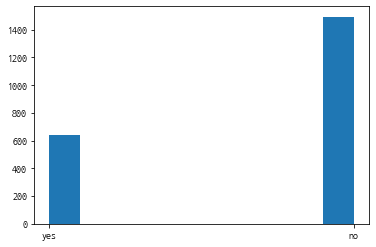

In [5]:
plt.hist(data['수주여부']);

## 문제 3) object 타입의 범주형 데이터를 수치형 데이터로 변환 하세요.

In [6]:
dic_obj2int = {}

for col in data.columns:
    if data[col].dtype == object:
        temp_category = data[col].astype('category')
        dic_obj2int[col] = temp_category.values.categories
        data[col] = temp_category.values.codes
        
data

,유사선박수주경험,국제유가,환율,선주사,선종,해운운임,중국입찰여부,선박크기,국내경쟁사입찰여부,수주잔고,입찰가,수주여부
0,1,48.59,959.88,3,4,2567.10,1,148071.91,0,100.13,24.51,1
1,1,46.72,1065.81,5,0,2933.79,1,122530.12,0,100.13,10.73,1
2,1,33.98,1110.06,1,0,1862.35,1,90058.56,0,132.26,10.20,1
3,1,35.46,1112.14,5,1,1935.54,0,74706.86,1,106.17,10.00,1
4,1,28.02,973.29,0,1,882.92,1,92176.26,0,100.13,17.17,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2132,1,28.87,945.23,6,1,1191.70,1,118431.45,0,100.46,10.00,0
2133,0,33.79,991.25,5,1,1084.47,0,67808.69,1,116.75,10.05,0
2134,1,47.20,1032.64,10,4,897.82,0,72223.35,1,112.49,10.00,0
2135,1,25.53,1176.16,3,0,1103.72,0,76325.82,0,129.09,10.02,0


In [7]:
dic_obj2int

{'유사선박수주경험': Index(['no', 'yes'], dtype='object'),
 '선주사': Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N'], dtype='object'),
 '선종': Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I'], dtype='object'),
 '중국입찰여부': Index(['no', 'yes'], dtype='object'),
 '국내경쟁사입찰여부': Index(['no', 'yes'], dtype='object'),
 '수주여부': Index(['no', 'yes'], dtype='object')}

## 문제 4) 범주형 변수의 데이터를 원-핫 인코딩 처리 하세요.

In [8]:
data = pd.get_dummies(data, columns = [col for col in dic_obj2int.keys() if col != '수주여부'])
data

,국제유가,환율,해운운임,선박크기,수주잔고,입찰가,수주여부,유사선박수주경험_0,유사선박수주경험_1,선주사_0,...,선종_3,선종_4,선종_5,선종_6,선종_7,선종_8,중국입찰여부_0,중국입찰여부_1,국내경쟁사입찰여부_0,국내경쟁사입찰여부_1
0,48.59,959.88,2567.10,148071.91,100.13,24.51,1,0,1,0,...,0,1,0,0,0,0,0,1,1,0
1,46.72,1065.81,2933.79,122530.12,100.13,10.73,1,0,1,0,...,0,0,0,0,0,0,0,1,1,0
2,33.98,1110.06,1862.35,90058.56,132.26,10.20,1,0,1,0,...,0,0,0,0,0,0,0,1,1,0
3,35.46,1112.14,1935.54,74706.86,106.17,10.00,1,0,1,0,...,0,0,0,0,0,0,1,0,0,1
4,28.02,973.29,882.92,92176.26,100.13,17.17,1,0,1,1,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2132,28.87,945.23,1191.70,118431.45,100.46,10.00,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
2133,33.79,991.25,1084.47,67808.69,116.75,10.05,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2134,47.20,1032.64,897.82,72223.35,112.49,10.00,0,0,1,0,...,0,1,0,0,0,0,1,0,0,1
2135,25.53,1176.16,1103.72,76325.82,129.09,10.02,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


## 문제 5) 훈련 데이터셋과 검증 데이터셋을 7:3 으로 분리하세요.

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()

X = data[[col for col in data.columns if col != '수주여부']]
X_scaled = minmax_scaler.fit_transform(X)

y = data['수주여부']

X_train, X_valid, y_train, y_valid = train_test_split(X_scaled, y, test_size=0.3, shuffle=True, stratify=y, random_state=34)

## 문제 6) 랜덤포레스트 모델로 학습을 진행하고, 정확도 85% 모델을 저장하세요.

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
pred = rf_model.predict(X_valid)
accuracy = accuracy_score(y_valid, pred)
print('Accuracy : {:.4f}'.format(accuracy))

Accuracy : 0.9190


## 문제 7) 6번 문제의 모델 성능을 예측하기 위해 confusioni matrix를 구하여 heatmap 으로 시각화 하세요.

[[445   4]
 [ 48 145]]


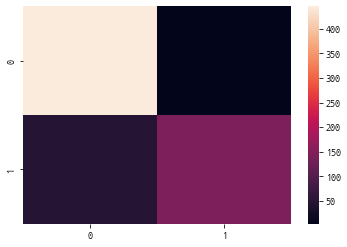

In [11]:
from sklearn.metrics import confusion_matrix

rf_model_matrix = confusion_matrix(y_valid, pred)
print(rf_model_matrix)
sns.heatmap(rf_model_matrix);

## 문제 8) 딥러닝 모델을 설계하고, 학습을 진행해 주세요 ( 정확도 85% 이상 모델)

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [13]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(35,)))
model.add(Dropout(0.3))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1 , activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                1152      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 1,697
Trainable params: 1,697
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [15]:
history = model.fit(X_train, y_train,
                    validation_data=(X_valid, y_valid),
                    epochs=50,
                    batch_size=16)

Epoch 1/50
94/94 [==============================] - 0s 3ms/step - loss: 0.6608 - accuracy: 0.6033 - val_loss: 0.5807 - val_accuracy: 0.7025
Epoch 2/50
94/94 [==============================] - 0s 2ms/step - loss: 0.5677 - accuracy: 0.7117 - val_loss: 0.5236 - val_accuracy: 0.7321
Epoch 3/50
94/94 [==============================] - 0s 2ms/step - loss: 0.5380 - accuracy: 0.7411 - val_loss: 0.4819 - val_accuracy: 0.7741
Epoch 4/50
94/94 [==============================] - 0s 2ms/step - loss: 0.5012 - accuracy: 0.7645 - val_loss: 0.4594 - val_accuracy: 0.7913
Epoch 5/50
94/94 [==============================] - 0s 2ms/step - loss: 0.4913 - accuracy: 0.7773 - val_loss: 0.4463 - val_accuracy: 0.8022
Epoch 6/50
94/94 [==============================] - 0s 2ms/step - loss: 0.4702 - accuracy: 0.7873 - val_loss: 0.4358 - val_accuracy: 0.8069
Epoch 7/50
94/94 [==============================] - 0s 2ms/step - loss: 0.4595 - accuracy: 0.7866 - val_loss: 0.4238 - val_accuracy: 0.7975
Epoch 8/50
94/94 [==

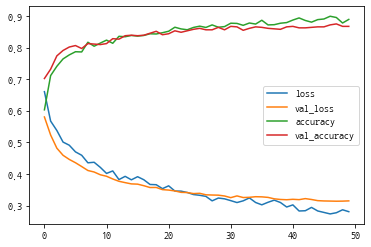

In [16]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss', 'accuracy','val_accuracy']].plot();

In [17]:
print('최고 성능 모델 정확도 : {:.4f}'.format(max(losses['accuracy'])))
print('마지막 모델 정확도: {:.4f}'.format(losses['accuracy'].iloc[-1]))

최고 성능 모델 정확도 : 0.8997
마지막 모델 정확도: 0.8896
